Considering the limitations in the insights provided by the visualizations of tokens, two and three grams analysis are provided for the same data corpus.

In [29]:
#Import the neccesary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
#Function to load the vulnerability phrases into a corpus
def load_vulnerability_phrases():
    
    phrases_corpus = []
    
    java_cve_phrase = pd.read_csv("../../javavultextdata/vulnerability_phrases.csv")
    
    for phrase in java_cve_phrase['vulnerability_phrases']:
        #Little pre-processing
        striped_phrase = str(phrase).strip()
        
        phrases_corpus.append(striped_phrase)
        
    return phrases_corpus

In [19]:
#The n-gram function
def get_ngrams(content, n):
    n_gram_output = []
    
    for i in range(len(content)-n+1):
        n_gram_output.append(content[i:i+n])
        
    return n_gram_output

In [20]:
#Call the get_ngrams function
three_grams = get_ngrams(load_vulnerability_phrases(), 3)

In [21]:
#Extract two or three-word sentences
def extract_three_or_two_sen(three_grams):
    three_words = []
    for ele_ in three_grams:
        for ele in ele_:
            x = ele.split(' ')
            if len(x) <= 3:
                three_words.append(ele)
    return three_words

In [22]:
#The list of the two and three-word sentences
list_of_two_three_sen = extract_three_or_two_sen(three_grams)

In [23]:
#Convert the vulnerabilities tokens to data frame to work with the visualization library
vul_sentences_df = pd.DataFrame(list_of_two_three_sen, columns=["vulnerability_sen"])

In [32]:
# Plot the Top 20 vulnerabilities Sentences
def plot_vulsen(df):
    #Size of the plot
    fig, ax = plt.subplots(figsize = (8,4))
    
    sns.barplot(df['vulnerability_sen'].value_counts()[1:20].values, df['vulnerability_sen'].value_counts()[1:20].index, palette=('magma'));
    
    # customization
    plt.xlabel('Vulnerabilities Sentences', fontsize=12)
    plt.xticks(size=12)
    plt.yticks(size=12)
    plt.title('Top 20 most Vulnerabilities Sentences', size=14)
    plt.show();

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


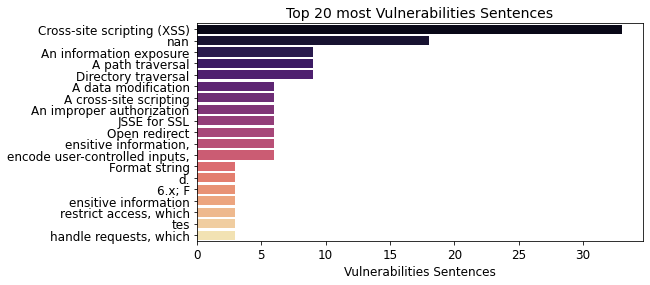

In [33]:
#Call the plot function
plot_vulsen(vul_sentences_df)